# Preprocessing - Part II

### Steps included:
* reading song & artist combined data
* cleaning data
* generating cosine similarity matrix
* generating top 10 recommenxations for each song
* saving recommendations as a matrix for fast loading

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

<ipython-input-1-d27a714ccb1e>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


#### Loading songs artist combined file

In [2]:
df = pd.read_csv("data/song_artist.csv")
df.head()

,id,name,artists,acousticness,danceability,energy,instrumentalness,liveness,speechiness,spotify_id,acousticness_artist,danceability_artist,energy_artist,instrumentalness_artist,liveness_artist,speechiness_artist
0,0,Blinding Lights,The Weeknd,0.00146,0.514,0.730,0.000095,0.0897,0.0598,0VjIjW4GlUZAMYd2vXMi3b,0.271439,0.574808,0.607873,0.010594,0.201728,0.086811
1,1,ROCKSTAR (feat. Roddy Ricch),DaBaby,0.24700,0.746,0.690,0.000000,0.1010,0.1640,7ytR5pFWmSjzHJIeQkgog4,0.093113,0.829283,0.657626,0.000002,0.170425,0.284725
2,2,death bed (coffee for your head) (feat. beabad...,Powfu,0.73100,0.726,0.431,0.000000,0.6960,0.1350,7eJMfftS33KTjuF7lTsMCx,0.393250,0.809500,0.408750,0.000062,0.234088,0.131225
3,3,THE SCOTTS,THE SCOTTS,0.23300,0.716,0.537,0.000000,0.1570,0.0514,39Yp9wwQiSRIDOvrVg7mbk,0.307500,0.706500,0.521000,0.000000,0.159000,0.052050
4,4,Supalonely,BENEE,0.30500,0.863,0.631,0.000030,0.1230,0.0534,4nK5YrxbMGZstTLbvj6Gxw,0.345733,0.757444,0.574333,0.000010,0.145644,0.041956


#### Separating numerical attributes & meta

In [3]:
song_id = df[["id", "name", "artists", "spotify_id"]]

In [4]:
data = df.drop(["id", "name", "artists", "acousticness", "danceability", "spotify_id"], axis = 1).copy()
data.head()

,energy,instrumentalness,liveness,speechiness,acousticness_artist,danceability_artist,energy_artist,instrumentalness_artist,liveness_artist,speechiness_artist
0,0.730,0.000095,0.0897,0.0598,0.271439,0.574808,0.607873,0.010594,0.201728,0.086811
1,0.690,0.000000,0.1010,0.1640,0.093113,0.829283,0.657626,0.000002,0.170425,0.284725
2,0.431,0.000000,0.6960,0.1350,0.393250,0.809500,0.408750,0.000062,0.234088,0.131225
3,0.537,0.000000,0.1570,0.0514,0.307500,0.706500,0.521000,0.000000,0.159000,0.052050
4,0.631,0.000030,0.1230,0.0534,0.345733,0.757444,0.574333,0.000010,0.145644,0.041956


#### Corelation between numerical attributes

<AxesSubplot:>

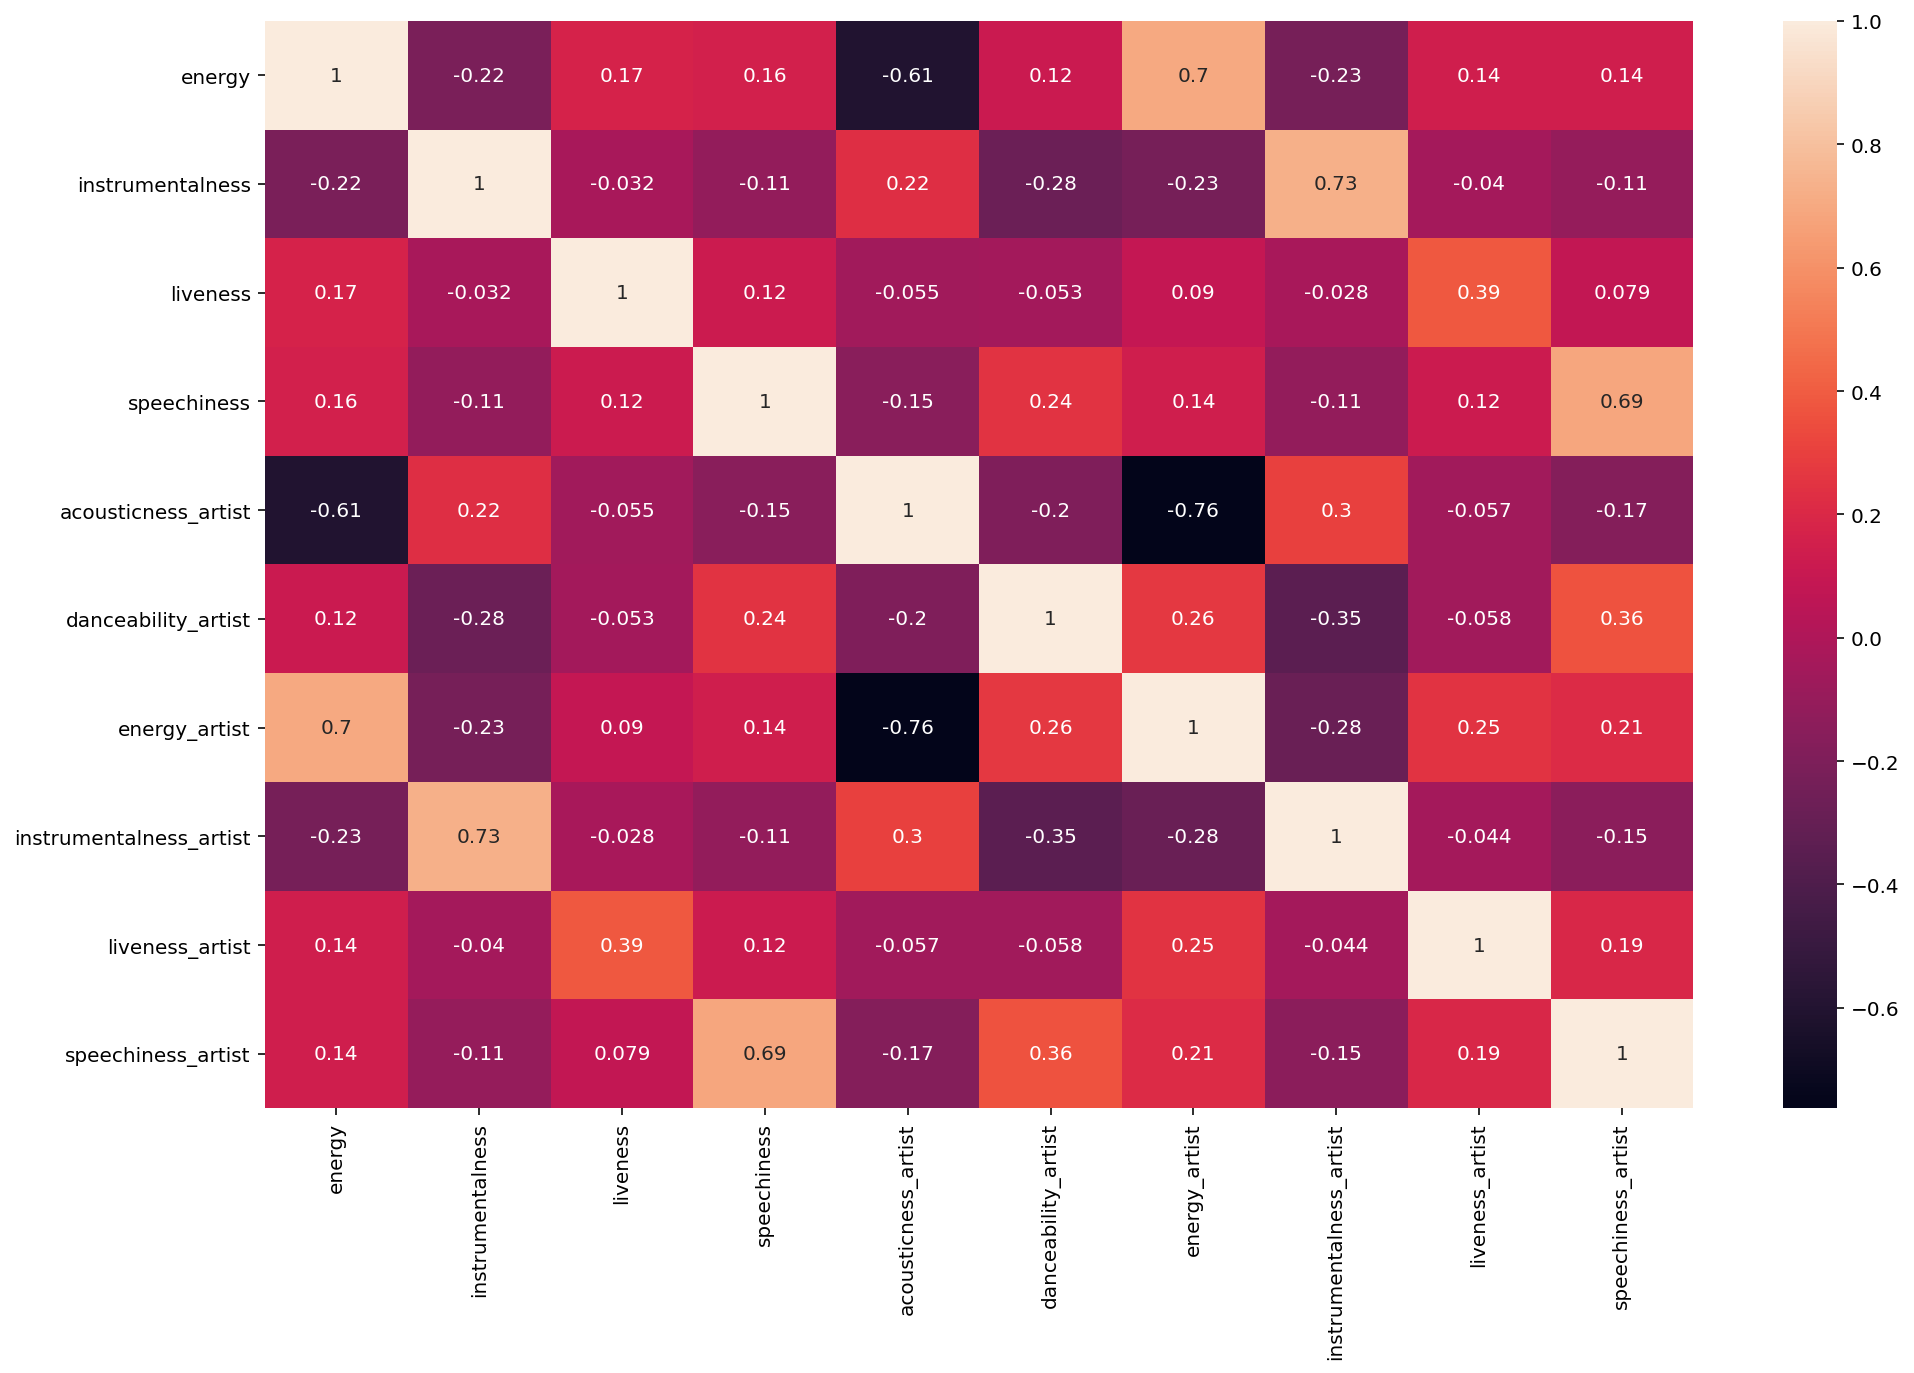

In [5]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True)

#### Limiting dataset to 40,000 songs because of memory contraints

In [6]:
meta = data.values
meta = meta[:40000, :]
meta.shape

(40000, 10)

#### Generating cosine similarity matrix
The following three cells will take significant time to execute

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(meta, meta)

In [8]:
np.save("data/similar.npy", cosine_sim)

In [9]:
song_id["search"] = song_id["name"] + ' ' + song_id["artists"]
song_id.to_csv("data/search.csv", index=False)

<ipython-input-9-6f1356cbcd1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_id["search"] = song_id["name"] + ' ' + song_id["artists"]


#### Finding top 10 similar songs for a given song and saving them in a matrix

In [10]:
def get_recommendations(idx, cosine_sim):
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar songs
    sim_scores = sim_scores[1:11]
    sim_scores.sort()
    # Get the song indices
    song_index = [i[0] for i in sim_scores]
    song_index = song_index
    
    # Return the top 10 most similar songs
    return song_index


sim = np.load("data/similar.npy")
all_res = np.zeros((1, 10))

for i in range(0, 40000):
    rec_list = get_recommendations(i, sim)
    rec_array = np.array(rec_list)
    rec_array = rec_array.reshape((1, 10))
    rec_array = rec_array.astype(int)
    all_res = np.append(all_res, rec_array, axis=0)
    print("saved for:" + str(i))

all_res = np.delete(all_res, 0, axis=0)
np.save("data/light.npy", all_res)

saved for:0
saved for:1
saved for:2
saved for:3
saved for:4
saved for:5
saved for:6
saved for:7
saved for:8
saved for:9
saved for:10
saved for:11
saved for:12
saved for:13
saved for:14
saved for:15
saved for:16
saved for:17
saved for:18
saved for:19
saved for:20
saved for:21
saved for:22
saved for:23
saved for:24
saved for:25
saved for:26
saved for:27
saved for:28
saved for:29
saved for:30
saved for:31
saved for:32
saved for:33
saved for:34
saved for:35
saved for:36
saved for:37
saved for:38
saved for:39
saved for:40
saved for:41
saved for:42
saved for:43
saved for:44
saved for:45
saved for:46
saved for:47
saved for:48
saved for:49
saved for:50
saved for:51
saved for:52
saved for:53
saved for:54
saved for:55
saved for:56
saved for:57
saved for:58
saved for:59
saved for:60
saved for:61
saved for:62
saved for:63
saved for:64
saved for:65
saved for:66
saved for:67
saved for:68
saved for:69
saved for:70
saved for:71
saved for:72
saved for:73
saved for:74
saved for:75
saved for:76
saved for

#### light.npy is a matrix where i<sup>th</sup> row will have 10 columns, each having the song_id for the recommended song